In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

import tqdm
pd.set_option("display.max_columns",None)

In [2]:
data=pd.read_csv("C:\\Users\\qluaj\\Downloads\\datashare\\GKX_20201231.csv")

In [18]:
display(data.head())

,permno,DATE,mvel1,RET,prc,SHROUT,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,mom6m,mom12m,mom36m,mve0,pricedelay,turn,absacc,acc,age,agr,cashdebt,cashpr,cfp,cfp_ia,chatoia,chcsho,chempia,chinv,chpmia,convind,currat,depr,divi,divo,dy,egr,ep,gma,grcapx,grltnoa,herf,hire,invest,lev,lgr,mve_ia,operprof,orgcap,pchcapx_ia,pchcurrat,pchdepr,pchgm_pchsale,pchquick,pchsale_pchinvt,pchsale_pchrect,pchsale_pchxsga,pchsaleinv,pctacc,ps,quick,rd,rd_mve,rd_sale,realestate,roic,salecash,saleinv,salerec,secured,securedind,sgr,sin,sp,tang,tb,aeavol,cash,chtx,cinvest,ear,nincr,roaq,roavol,roeq,rsup,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,bm,bm_ia
0,10006,19260130,65400.0,0.032732,110.2500,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66150.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006857,NaN,NaN,NaN,NaN,NaN,0.000066,NaN,NaN,NaN
1,10022,19260130,11200.0,0.017857,57.0000,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11400.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018018,NaN,NaN,NaN,NaN,NaN,0.000003,NaN,NaN,NaN
2,10030,19260130,23400.0,0.161667,174.2500,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27183.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004158,NaN,NaN,NaN,NaN,NaN,0.000023,NaN,NaN,NaN
3,10049,19260130,18500.0,0.141892,83.5000,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20875.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006780,NaN,NaN,NaN,NaN,NaN,0.000022,NaN,NaN,NaN
4,10057,19260130,6125.0,-0.035714,11.8125,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5906.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071795,NaN,NaN,NaN,NaN,NaN,0.000010,NaN,NaN,NaN


In [4]:
data.describe()

,permno,DATE,mvel1,RET,prc,SHROUT,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,mom6m,mom12m,mom36m,mve0,pricedelay,turn,absacc,acc,age,agr,cashdebt,cashpr,cfp,cfp_ia,chatoia,chcsho,chempia,chinv,chpmia,convind,currat,depr,divi,divo,dy,egr,ep,gma,grcapx,grltnoa,herf,hire,invest,lev,lgr,mve_ia,operprof,orgcap,pchcapx_ia,pchcurrat,pchdepr,pchgm_pchsale,pchquick,pchsale_pchinvt,pchsale_pchrect,pchsale_pchxsga,pchsaleinv,pctacc,ps,quick,rd,rd_mve,rd_sale,realestate,roic,salecash,saleinv,salerec,secured,securedind,sgr,sin,sp,tang,tb,aeavol,cash,chtx,cinvest,ear,nincr,roaq,roavol,roeq,rsup,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,bm,bm_ia
count,4.345508e+06,4.345508e+06,4.341591e+06,4.345508e+06,4.324990e+06,4.345508e+06,3.939040e+06,3.939040e+06,4.001469e+06,3.989509e+06,3.939040e+06,4.339676e+06,4.313535e+06,4.186988e+06,4.001469e+06,3.340092e+06,4.324990e+06,3.938968e+06,3.993946e+06,2.531290e+06,2.531290e+06,3.043443e+06,2.801068e+06,2.888999e+06,2.996349e+06,2.722053e+06,2.722053e+06,2.549417e+06,2.797365e+06,2.760915e+06,2.714461e+06,2.751834e+06,3.043443e+06,2.916991e+06,2.829723e+06,2.801111e+06,2.801111e+06,3.029536e+06,2.773114e+06,3.040343e+06,2.794537e+06,2.412704e+06,2.084536e+06,3.043421e+06,2.760915e+06,2.653007e+06,3.026848e+06,2.785910e+06,3.040373e+06,2.678154e+06,2.079744e+06,2.644386e+06,2.674916e+06,2.592291e+06,2.756774e+06,2.644843e+06,2.155713e+06,2.654462e+06,2.268968e+06,2.130973e+06,2.531243e+06,2.801111e+06,2.888392e+06,2.801111e+06,1.441667e+06,1.417414e+06,1.057409e+06,2.898034e+06,3.005344e+06,2.333983e+06,2.908355e+06,1.577074e+06,3.043443e+06,2.757753e+06,3.043443e+06,3.032903e+06,2.849633e+06,2.687370e+06,2.428294e+06,2.352223e+06,2.261610e+06,2.230146e+06,2.456020e+06,2.458391e+06,2.373858e+06,2.037767e+06,2.434728e+06,2.394361e+06,1.578163e+06,1.578163e+06,2.391245e+06,4.344799e+06,4.033964e+06,4.344386e+06,4.341469e+06,4.023603e+06,4.039162e+06,4.033076e+06,3.794986e+06,2.895560e+06,2.895560e+06
mean,5.325557e+04,1.990655e+07,1.247499e+06,1.083914e-02,3.114100e+01,4.502779e+04,1.014689e+00,1.439388e+00,1.942932e-03,1.073903e+01,5.907619e-02,1.228425e-01,9.285117e-03,4.841064e-02,1.157526e-01,3.052756e-01,1.259937e+06,1.436138e-01,1.085715e+00,8.997600e-02,-2.382565e-02,1.179198e+01,-1.532771e-01,-1.105997e-02,-1.638191e-01,7.298118e-02,-9.919576e-02,1.919245e-04,1.093552e-01,-1.170337e-01,1.201701e-02,5.399412e-02,1.366512e-01,3.810447e+00,2.684226e-01,3.084276e-02,2.977426e-02,2.082329e-02,1.366537e-01,-2.240996e-02,3.478440e-01,8.927855e-01,8.659731e-02,9.033557e-02,8.622214e-02,7.931538e-02,2.192329e+00,2.538587e-01,-1.784769e+02,1.478161e-01,1.326817e-02,2.076377e+00,8.040123e-02,1.078251e-01,-7.497678e-02,1.052739e-01,-5.698775e-02,-5.250881e-02,1.746389e-02,1.508442e-01,-8.401361e-01,4.200257e+00,3.129632e+00,1.291227e-01,6.072733e-02,6.749123e-01,2.642848e-01,-9.847790e-02,4.835279e+01,2.824523e+01,1.161556e+01,5.570301e-01,4.117219e-01,1.882818e-01,9.030562e-03,2.139841e+00,5.346906e-01,-1.731183e-01,8.191582e-01,1.603764e-01,9.115235e-04,1.917708e-01,2.862046e-03,1.001284e+00,-1.095922e-03,2.734042e-02,5.269979e-03,1.731898e-02,7.453502e+00,1.651864e+01,3.646822e+00,5.190970e-02,7.454232e-06,6.917272e-02,3.023371e-02,8.430522e-01,4.237665e+00,1.615366e+00,4.757172e+01,2.504760e+00,-6.097849e-01
std,2.874066e+04,1.989747e+05,6.074550e+06,1.740540e-01,1.347706e+03,2.316850e+05,6.367772e-01,1.695572e+00,5.339095e-01,3.041627e+00,3.699511e-02,2.882146e-01,1.471765e-01,3.491333e-01,5.535658e-01,8.985318e-01,6.142191e+06,1.232981e+00,2.120222e+01,9.926491e-02,1.267072e-01,1.068754e+01,4.171288e-01,2.094957e+01,8.219100e+01,1.309402e+00,6.325315e+00,2.153670e-01,3.196323e-01,1.204796e+00,5.463806e-02,6.729679e+00,3.434788e-01,1.244856e+01,4.976011e-01,1.728916e-01,1.699640e-01,4.271944e-02,6.650846e-01,3.614812e-01,3.352182e-01,4.433307e+00,1.560697e-01,9.871628e-02,3.704508e-01,1.823163e-01,4.715336e+00,8.663056e-01,8.746378e+03,5.144656e-01,1.551706e-02,4.

In [5]:
data.shape

(4345508, 101)

In [4]:
df_train1=data[(data.DATE>=19600101)&(data.DATE<19780101)]
df_validation1=data[(data.DATE>=19780101)&(data.DATE<19900101)]
df_test1=data[(data.DATE>=19900101)&(data.DATE<19910101)]
df_train=df_train1.copy()
df_validation=df_validation1.copy()
df_test=df_test1.copy()
df_train.shape,df_validation.shape,df_test.shape

((618127, 101), (847106, 101), (81177, 101))

In [3]:
def missing_values_table(df):
    missing_value = df.isnull().sum() 
    missing_rate = 100 * df.isnull().sum() / len(df) 
    missing_table = pd.concat([missing_value, missing_rate], axis = 1) 
    missing_table_ren_columns = missing_table.rename(columns = {0:'Missing Values',
                                                               1:'Missing Rate'})
    missing_table_ren_columns = missing_table_ren_columns[
        missing_table_ren_columns.iloc[:,1] != 0].sort_values('Missing Rate',ascending=False).round(1)
    return missing_table_ren_columns

def missing_value_filling(df):
    missing_train=missing_values_table(df)
    missing_columns_low = pd.DataFrame(missing_train[missing_train['Missing Rate'] < 50])
    missing_columns_high = pd.DataFrame(missing_train[missing_train['Missing Rate'] >= 50])
    data=pd.DataFrame(df.interpolate())
    data[missing_columns_low.index].fillna(data.mean(),inplace=True)
    data[missing_columns_high.index].fillna(data.mode(),inplace=True)
    data.fillna(0,inplace=True)
    data=pd.DataFrame(data)
    return data

In [5]:
df_train=missing_value_filling(df_train)
df_validation=missing_value_filling(df_validation)
df_test=missing_value_filling(df_test)

In [6]:
#Normalize the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import r2_score

In [7]:
#Define out-of-sample R-square
def rsquare_oos(ytrue,ypred):
    dif2=np.sum(np.power(ytrue-ypred,2))
    return 1-dif2/np.sum(np.power(ytrue,2))

### Simple linear regression--OLS

In [8]:
scaler=StandardScaler()
minmax=MinMaxScaler()

X_train=df_train.drop("RET",axis=1).copy()
X_train=scaler.fit_transform(X_train)
X_validation=df_validation.drop("RET",axis=1).copy()
X_validation=scaler.transform(X_validation)
X_test=df_test.drop("RET",axis=1).copy()
X_test=scaler.transform(X_test)

y_train=df_train[["RET"]].copy()
y_validation=df_validation[["RET"]].copy()
y_test=df_test[["RET"]].copy()
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)
y_validation=scaler.transform(y_validation)

In [13]:
# fit train data

lr=LinearRegression()
lr.fit(X_train,y_train)

y_train_pred=lr.predict(X_train)

score_train=rsquare_oos(y_train,y_train_pred)
score_train

0.056341234346004465

In [14]:
# evaluate the validation data

y_validation_pred=lr.predict(X_validation)

score_validation=rsquare_oos(y_validation,y_validation_pred)
score_validation

-2.45550412005572e+21

In [15]:
# evaluate the test data

y_test_pred=lr.predict(X_test)

score_test=rsquare_oos(y_test,y_test_pred)
score_test

-2.4124561954901803e+20

In [16]:
#The recursive performance evaluation scheme
train_score=[0]*31
validation_score=[0]*31
test_score=[0]*31


In [17]:
for i in range(0,31):
    print('Evaluation Window {}:\nTrain data:1960-{}\nValuation data:{}-{}\nTest data:{}-{}'.format(i,1978+i,1978+i,1990+i,1990+i,1991+i))
    data_train=data[(data.DATE>=19600101)&(data.DATE<19780101+i*10000)]
    data_validation=data[(data.DATE>=19780101+i*10000)&(data.DATE<19900101+i*10000)]
    data_test=data[(data.DATE>=19900101+i*10000)&(data.DATE<19910101+i*10000)]
    data_train=missing_value_filling(data_train)
    data_validation=missing_value_filling(data_validation)
    data_test=missing_value_filling(data_test)
    #Normalize
    X_train=data_train.drop("RET",axis=1).copy()
    X_train=scaler.fit_transform(X_train)
    X_validation=data_validation.drop("RET",axis=1).copy()
    X_validation=scaler.transform(X_validation)
    X_test=data_test.drop("RET",axis=1).copy()
    X_test=scaler.transform(X_test)

    y_train=data_train[["RET"]].copy()
    y_validation=data_validation[["RET"]].copy()
    y_test=data_test[["RET"]].copy()
    y_train=scaler.fit_transform(y_train)
    y_test=scaler.transform(y_test)
    y_validation=scaler.transform(y_validation)
    
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_train_pred=lr.predict(X_train)
    train_score[i]=rsquare_oos(y_train,y_train_pred)
    y_validation_pred=lr.predict(X_validation)
    validation_score[i]=rsquare_oos(y_validation,y_validation_pred)
    y_test_pred=lr.predict(X_test)
    test_score[i]=rsquare_oos(y_test,y_test_pred)
    
    del data_train,data_validation,data_test,X_train,y_train,X_test,y_test,X_validation,y_validation

Evaluation Window 0:
Train data:1960-1978
Valuation data:1978-1990
Test data:1990-1991
Evaluation Window 1:
Train data:1960-1979
Valuation data:1979-1991
Test data:1991-1992
Evaluation Window 2:
Train data:1960-1980
Valuation data:1980-1992
Test data:1992-1993
Evaluation Window 3:
Train data:1960-1981
Valuation data:1981-1993
Test data:1993-1994
Evaluation Window 4:
Train data:1960-1982
Valuation data:1982-1994
Test data:1994-1995
Evaluation Window 5:
Train data:1960-1983
Valuation data:1983-1995
Test data:1995-1996
Evaluation Window 6:
Train data:1960-1984
Valuation data:1984-1996
Test data:1996-1997
Evaluation Window 7:
Train data:1960-1985
Valuation data:1985-1997
Test data:1997-1998
Evaluation Window 8:
Train data:1960-1986
Valuation data:1986-1998
Test data:1998-1999
Evaluation Window 9:
Train data:1960-1987
Valuation data:1987-1999
Test data:1999-2000
Evaluation Window 10:
Train data:1960-1988
Valuation data:1988-2000
Test data:2000-2001
Evaluation Window 11:
Train data:1960-1989

In [18]:
test_score=pd.DataFrame(test_score)
print(test_score)

               0
0  -2.412456e+20
1  -1.394634e+20
2  -1.216582e+20
3  -4.148930e+18
4  -3.217404e+20
5  -2.325075e+20
6  -2.451767e+20
7  -1.466161e+20
8  -2.876430e+00
9  -2.081164e+00
10 -1.819377e+00
11 -1.109241e+00
12 -7.230274e-01
13 -7.074106e-01
14 -1.209304e+00
15 -1.847055e+00
16 -1.864607e+00
17 -2.413526e+00
18 -7.281078e-01
19 -1.221368e-01
20 -2.960691e-01
21 -1.705971e-01
22 -1.698587e-01
23 -1.133728e-01
24 -1.886261e-01
25 -1.355172e-01
26 -1.330867e-01
27 -2.965147e-01
28 -2.446434e-01
29 -4.096152e-01
30 -3.888674e-02


In [19]:
validation_score=pd.DataFrame(validation_score)
print(validation_score)

               0
0  -2.455504e+21
1  -1.897154e+21
2  -1.299392e+21
3  -3.308242e+19
4  -1.589594e+21
5  -1.517754e+21
6  -1.858157e+21
7  -1.098359e+21
8  -4.111859e-01
9  -5.310313e-01
10 -6.714564e-01
11 -5.375355e-01
12 -3.521283e-01
13 -3.175739e-01
14 -2.883965e-01
15 -2.825183e-01
16 -2.846983e-01
17 -2.758750e-01
18 -2.719661e-01
19 -2.346251e-01
20 -1.319180e-01
21 -5.081654e-02
22 -2.319199e-02
23 -6.160925e-03
24 -9.833033e-03
25 -2.406757e-02
26 -3.752016e-02
27 -4.162637e-02
28 -4.194994e-02
29 -4.386204e-02
30 -5.488972e-02


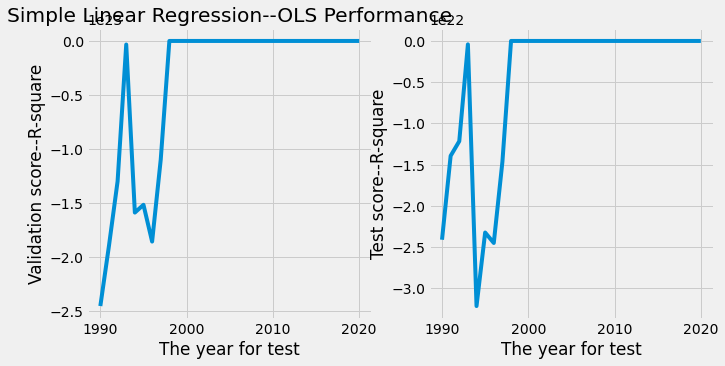

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Simple Linear Regression--OLS Performance")
year=np.arange(1990,2021)
plt.plot(year,100*validation_score.values)
plt.xlabel("The year for test")
plt.ylabel("Validation score--R-square")

plt.subplot(1,2,2)
plt.plot(year,100*test_score.values)
plt.xlabel("The year for test")
plt.ylabel("Test score--R-square")
plt.show()

### Simple linear regression--OLS-3

In [13]:
#The recursive performance evaluation scheme
train_score_3=[0]*31
validation_score_3=[0]*31
test_score_3=[0]*31


In [20]:
#Recursive evaluation performance scheme
for i in range(0,31):
    print('Evaluation Window {}:\nTrain data:1960-{}\nValuation data:{}-{}\nTest data:{}-{}'.format(i,1978+i,1978+i,1990+i,1990+i,1991+i))
    data_train=data[(data.DATE>=19600101)&(data.DATE<19780101+i*10000)]
    data_validation=data[(data.DATE>=19780101+i*10000)&(data.DATE<19900101+i*10000)]
    data_test=data[(data.DATE>=19900101+i*10000)&(data.DATE<19910101+i*10000)]
    data_train=missing_value_filling(data_train)
    data_validation=missing_value_filling(data_validation)
    data_test=missing_value_filling(data_test)
    #Normalize
    X_train=data_train[['mom12m','bm','mvel1']].copy()
    X_train=scaler.fit_transform(X_train)
    X_validation=data_validation[['mom12m','bm','mvel1']].copy()
    X_validation=scaler.transform(X_validation)
    X_test=data_test[['mom12m','bm','mvel1']].copy()
    X_test=scaler.transform(X_test)
    
    y_train=data_train[["RET"]].copy()
    y_train=scaler.fit_transform(y_train)
    y_validation=data_validation[["RET"]].copy()
    y_validation=scaler.transform(y_validation)
    y_test=data_test[["RET"]].copy()
    y_test=scaler.transform(y_test)
    
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_train_pred=lr.predict(X_train)
    train_score_3[i]=rsquare_oos(y_train,y_train_pred)
    y_validation_pred=lr.predict(X_validation)
    validation_score_3[i]=rsquare_oos(y_validation,y_validation_pred)
    y_test_pred=lr.predict(X_test)
    test_score_3[i]=rsquare_oos(y_test,y_test_pred)
    print( validation_score_3[i],test_score_3[i])
    del data_train,data_validation,data_test,X_train,y_train,X_test,y_test,X_validation,y_validation

Evaluation Window 0:
Train data:1960-1978
Valuation data:1978-1990
Test data:1990-1991
-0.0012749741297670703 0.002230710049088258
Evaluation Window 1:
Train data:1960-1979
Valuation data:1979-1991
Test data:1991-1992
-0.0007851631128104053 -0.0031249037752585362
Evaluation Window 2:
Train data:1960-1980
Valuation data:1980-1992
Test data:1992-1993
-0.001799536752086217 -0.0013758249052593374
Evaluation Window 3:
Train data:1960-1981
Valuation data:1981-1993
Test data:1993-1994
-0.0016893559883985887 -0.0004151620183705518
Evaluation Window 4:
Train data:1960-1982
Valuation data:1982-1994
Test data:1994-1995
-0.001085288471867285 5.447811140268932e-05
Evaluation Window 5:
Train data:1960-1983
Valuation data:1983-1995
Test data:1995-1996
-0.001106478986250492 -0.004050302733588529
Evaluation Window 6:
Train data:1960-1984
Valuation data:1984-1996
Test data:1996-1997
-0.0007640311792980192 -0.0037848905470498906
Evaluation Window 7:
Train data:1960-1985
Valuation data:1985-1997
Test data

In [21]:
test_score_3a=pd.DataFrame(test_score_3)
test_score_3a.to_csv("C:\\Users\\qluaj\\Downloads\\datashare\\ols3_test.csv")

In [22]:
validation_score_3a=pd.DataFrame(validation_score_3)
validation_score_3a.to_csv("C:\\Users\\qluaj\\Downloads\\datashare\\ols3_val.csv")

In [9]:
scaler=StandardScaler()
minmax=MinMaxScaler()

X_train=df_train[['mom12m','bm','mvel1']].copy()
X_train=scaler.fit_transform(X_train)
X_validation=df_validation[['mom12m','bm','mvel1']].copy()
X_validation=scaler.transform(X_validation)
X_test=df_test[['mom12m','bm','mvel1']].copy()
X_test=scaler.transform(X_test)

y_train=df_train[["RET"]].copy()
y_validation=df_validation[["RET"]].copy()
y_test=df_test[["RET"]].copy()
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)
y_validation=scaler.transform(y_validation)

In [10]:
# fit train data

lr=LinearRegression()
lr.fit(X_train,y_train)

y_train_pred=lr.predict(X_train)

score_train=rsquare_oos(y_train,y_train_pred)
score_train

0.0013376444955366384

In [11]:
# evaluate the validation data

y_validation_pred=lr.predict(X_validation)

score_validation=rsquare_oos(y_validation,y_validation_pred)
score_validation

-0.0012749741297670703

In [12]:
# evaluate the test data

y_test_pred=lr.predict(X_test)

score_test=rsquare_oos(y_test,y_test_pred)
score_test

0.002230710049088258